To upload **.csv** file from my local drive.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep (1).csv


To import it into a **dataframe** (make sure the filename matches the name of the uploaded file).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

import io
df = pd.read_csv(io.BytesIO(uploaded['HR_comma_sep.csv']))
print(df.to_string())

Output hidden; open in https://colab.research.google.com to view.

Show first 5 rows:

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low



**Data exploration and visualization:**

How much Employee Left the company till date:

In [ ]:
main_data_len=len(df)
print(f"Size of the orginal Data: {main_data_len-1}")

lefts = df[df.left==1]
print(f"Shape of the Left Employee Data: {lefts.shape}")

left_len=len(lefts)
print(f"{left_len} Employee Left the Company till now.")

left_percentage= round(left_len*100/main_data_len,2)
print(f"{left_percentage}% People Left the Company.")

Size of the orginal Data: 14998
Shape of the Left Employee Data: (3571, 10)
3571 Employee Left the Company till now.
23.81% People Left the Company.


How much Employee work in the company till date:

In [ ]:
retained = df[df.left==0]
print(f"Shape of the Retaind Employee Data: {retained.shape}")

retained_len=len(retained)
print(f"{retained_len} Employee Retained the Company now.")

retained_percentage= round(retained_len*100/main_data_len, 2)
print(f"{retained_percentage}% People Retained the Company now.")


Shape of the Retaind Employee Data: (11428, 10)
11428 Employee Retained the Company now.
76.19% People Retained the Company now.



**Graphical exploration and visualization of 'Left' & 'Retained' Data:**

[76.19, 23.81]
['Retained', 'Left']


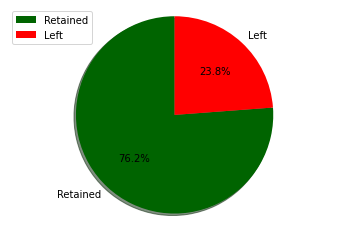

In [ ]:
a=retained['left']
b=lefts['left']

topic = ['Retained', 'Left']
Postive_percentage = [76.19, 23.81]
sizes = Postive_percentage
print(sizes)
labels = list(topic)
print(labels)
colors = ['darkgreen', 'red']

#plt.pie(sizes, labels, colors)
plt.pie(sizes, explode=None, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal')
plt.legend()
plt.show()


Average numbers for all columns:

In [ ]:
df.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


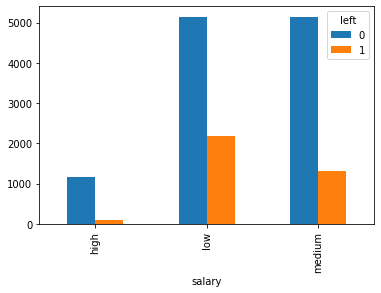

In [ ]:
pd.crosstab(df.salary,df.left).plot(kind='bar')

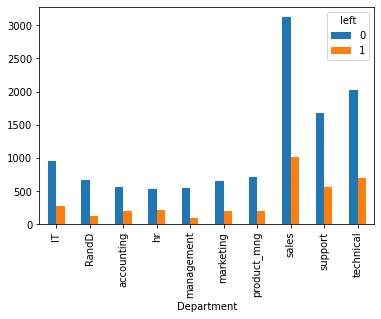

In [ ]:
pd.crosstab(df.Department,df.left).plot(kind='bar')

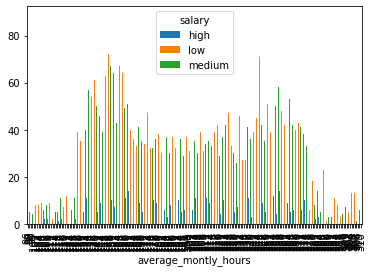

In [ ]:
pd.crosstab(df.average_montly_hours,df.salary).plot(kind='bar')

**Study with salary:**

In [ ]:
salary_df = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
salary_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Create **Salary** to a dummie variable:

In [ ]:
salary_dummies = pd.get_dummies(salary_df.salary, prefix="salary")

Add **salary_dummies** with **salary_df:**

In [121]:
df_with_dummies = pd.concat([salary_df, salary_dummies],axis='columns')
print(df_with_dummies.head(25))

    satisfaction_level  average_montly_hours  promotion_last_5years  salary  \
0                 0.38                   157                      0     low   
1                 0.80                   262                      0  medium   
2                 0.11                   272                      0  medium   
3                 0.72                   223                      0     low   
4                 0.37                   159                      0     low   
5                 0.41                   153                      0     low   
6                 0.10                   247                      0     low   
7                 0.92                   259                      0     low   
8                 0.89                   224                      0     low   
9                 0.42                   142                      0     low   
10                0.45                   135                      0     low   
11                0.11                   305        

Remove the **Salary** dolumn from **df_with_dummies** data frame:

In [ ]:
df_with_dummies.drop('salary',axis='columns',inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


**For Logistic Regression Model prepare X & y:**

*Prepare X:*

In [ ]:
X = df_with_dummies
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


*Prepare y:*

In [ ]:
y = df.left

*Training the model using 20% of data:*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.2)

**Create Logistic Regression Model using above(X & y):**

In [ ]:
# from sklearn.linear_model import LogisticRegression
# model = LogisticRegression()

# model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

*Predict the o/p from **X_test** data:*

In [ ]:
model.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df_with_dummies[['satisfaction_level', 'average_montly_hours',	'promotion_last_5years',	'salary_high',	'salary_low',	'salary_medium']],df.left)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predict the O/P:**

In [ ]:

satisfaction_levels= float(input("Enter satisfaction_level: "))
average_montly_hourss= float(input("Enter average_montly_hours: "))
promotion_last_5yearss= int(input("Enter promotion_last_5years: "))
salary_highs= int(input("Enter salary_high: "))
salary_lows= int(input("Enter salary_low: "))
salary_mediums= int(input("Enter salary_medium: "))

ans = regs.predict([[satisfaction_levels, average_montly_hourss,	promotion_last_5yearss,	salary_highs,	salary_lows,	salary_mediums]])
# print(ans)

if ans<0:
  print("Emplyee NOT Leave the Job.")
elif ans>0.50:
  print("Emplyee Leave the Job.")


Enter satisfaction_level: .97
Enter average_montly_hours: 167
Enter promotion_last_5years: 1
Enter salary_high: 1
Enter salary_low: 0
Enter salary_medium: 0
Emplyee NOT Leave the Job.
